In [10]:
import imageio
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2

In [ ]:
vid_path = '../data/commaai/destination/Chunk_1_b0c9d2329ad1606b_2018-07-27--06-03-57_10.hevc'
value_path = '../data/commaai/destination/Chunk_1_b0c9d2329ad1606b_2018-07-27--06-03-57_10.value'
t_path = '../data/commaai/destination/Chunk_1_b0c9d2329ad1606b_2018-07-27--06-03-57_10.t'

In [11]:
def find_closest_element(y: float, arr: np.ndarray):
    index = np.searchsorted(arr,y)
    if index >= 1:
        res = [arr[index - 1], arr[index]]
    else:
        return np.array(index)

    if res[0] == res[1]:
        return np.array(index - 1)
    else:
        diff_pre = np.abs(y-res[0])
        diff_aft = np.abs(y-res[1])
        if diff_pre == diff_aft:
            return np.array(index - 1, index), 
        else:
            return index - 1 if diff_pre < diff_aft else index

In [33]:
def read_vid_angles(vid_path, value_path, t_path):
    
    # read video
    vid = imageio.get_reader(vid_path,  'ffmpeg')
    frames = np.array([im for im in vid.iter_data()], dtype=np.uint8)
    vid.close()
    
    # read steering angles
    angle = np.load(value_path)
    
    # read device boot time
    t = np.load(t_path)
    
    # dataframe of angles and timestamps
    angles = pd.DataFrame({'t' : t, 'angle': angle})
    
    # get timestamps of frames
    timestamps_frames = np.zeros(frames.shape[0])
    start_stamp = t[0] 
    timestamps_frames[0] = start_stamp
    for i in range(1, len(timestamps_frames)):
        timestamps_frames[i] = timestamps_frames[i - 1] + 0.05
    
    # get angles per frame
    target_angles = [angles.loc[find_closest_element(timestamps_frames[i], np.array(angles['t'])),'angle'] for i in range(0, len(timestamps_frames))]
    
    # downsamples images
    new_height = 640
    new_width = 360
    rez_frames = []
    for i in range(0, frames.shape[0]):
        frames_i = cv2.resize(frames[i, :, :, :], dsize = (new_height,new_width), interpolation = cv2.INTER_LINEAR)
        rez_frames.append(frames_i)
    rez_frames = np.array(rez_frames)
     return every 5th frame
    return(frames, np.array(target_angles[::5]))


In [34]:
frames, y = read_vid_angles(vid_path, value_path, t_path)

In [35]:
frames[0].shape

(874, 1164, 3)

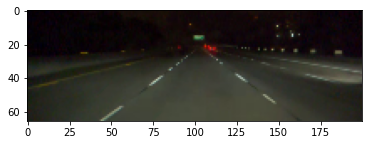

In [47]:
new_height = 291
new_width = 218
plt.imshow(cv2.resize(frames[100, :, :, :], dsize = (new_height,new_width), interpolation = cv2.INTER_LINEAR)[76:142, 45:245,:])

In [40]:
x = cv2.resize(frames[i, :, :, :], dsize = (new_height,new_width), interpolation = cv2.INTER_LINEAR)[76:142, 45:245,:]

In [42]:
i

239

In [16]:
new_width = 360
new_height = 640
rez_frames = []
for i in range(0, frames.shape[0]):
    frames_i = cv2.resize(frames[i], dsize = (new_height,new_width), interpolation = cv2.INTER_LINEAR)
    rez_frames.append(frames_i)

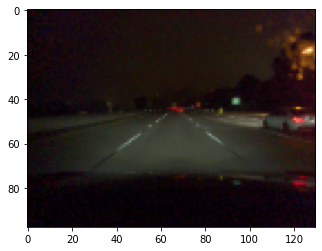

In [22]:
plt.imshow(cv2.resize(x[0], dsize = (int(x[1].shape[1]*0.75), int(x[0].shape[0]*0.75)), interpolation = cv2.INTER_LINEAR))

In [ ]:
vid = imageio.get_reader(vid_path,  'ffmpeg')

In [ ]:
frames = np.array([im for im in vid.iter_data()], dtype=np.uint8)
vid.close()

In [ ]:
frames.shape

In [ ]:
plt.imshow(frames[0])

In [ ]:
frames.shape

In [ ]:
value_path = '../data/commaai/destination/Chunk_1_b0c9d2329ad1606b_2018-07-27--06-03-57_10.value'

In [ ]:
angle = np.load(value_path)

In [ ]:
angle.shape

In [ ]:
max(angle) - min(angle)

In [ ]:
t_path = '../data/commaai/destination/Chunk_1_b0c9d2329ad1606b_2018-07-27--06-03-57_10.t'
t = np.load(t_path)

In [ ]:
t.shape

In [ ]:
t

In [ ]:
from logreader import LogReader

In [ ]:
from scrapy import log

In [ ]:
log_path = '../data/commaai/othertry/comma2k19/Chunk_1/B6WPC0~1/8/raw_log.bz2'

In [ ]:
# check times

In [ ]:
vid_path = '../data/commaai/othertry/comma2k19/Chunk_1/B2ESEM~F/25/video.hevc'
vid = imageio.get_reader(vid_path,  'ffmpeg')
frames = np.array([im for im in vid.iter_data()], dtype=np.uint8)
vid.close()
value_path = '../data/commaai/othertry/comma2k19/Chunk_1/B2ESEM~F/25/processed_log/CAN/steering_angle/value'
angle = np.load(value_path)
t_path = '../data/commaai/othertry/comma2k19/Chunk_1/B2ESEM~F/25/processed_log/CAN/steering_angle/t'
t = np.load(t_path)

In [ ]:
ft_path = '../data/commaai/othertry/comma2k19/Chunk_1/B2ESEM~F/25/global_pose/frame_gps_times'
ft = np.load(t_path)

In [ ]:
angles = pd.DataFrame({'t' : t, 'angle': angle})

In [ ]:
timestamps_frames = np.zeros(frames.shape[0])

In [ ]:
start_stamp = t[0] 
timestamps_frames[0] = start_stamp

In [ ]:
for i in range(1, len(timestamps_frames)):
    timestamps_frames[i] = timestamps_frames[i - 1] + 0.05

In [ ]:
def find_closest_element(y: float, arr: np.ndarray):
    index = np.searchsorted(arr,y)
    if index >= 1:
        res = [arr[index - 1], arr[index]]
    else:
        return np.array(index)

    if res[0] == res[1]:
        return np.array(index - 1)
    else:
        diff_pre = np.abs(y-res[0])
        diff_aft = np.abs(y-res[1])
        if diff_pre == diff_aft:
            return np.array(index - 1, index), 
        else:
            return index - 1 if diff_pre < diff_aft else index

In [ ]:
target_angles = [angles.loc[find_closest_element(timestamps_frames[i], np.array(angles['t'])),'angle'] for i in range(0, len(timestamps_frames))]

In [ ]:
target_angles

In [ ]:
t[6] - t[5]

In [ ]:
frames.shape

In [ ]:
ft.shape

In [ ]:
plt.plot(t, angle)

In [ ]:
plt.imshow(frames[500])

In [ ]:
angle[100]

In [ ]:
frames.shape

In [ ]:
from framereader import FrameReader